In [1]:
from itertools import chain, combinations 
import pandas
from sklearn import tree, linear_model

from data_loading import load_mibig_metadata, load_data
from prediction_utils import siderophore_preprocess, create_clf_data
from stability_utils import (fit_cross_val_and_plot_pr, 
                             visualize_tree_rules,
                             visualize_lasso_coeffs)

# Overview

If you haven't read `pfam_stability.ipynb` please do so, as this will use functionality from that notebook rather tersely. We will perform the same three basic analyses

1. Repeated Cross-Validation PR Curves
2. Stability analysis of rules
3. Stability analyses of lasso coefficients

This time, we will do it for _all_ possible featuresets and compare. 

In [2]:
meta = load_mibig_metadata()
datasets = load_data(meta)

Using 848 BGCs with both pfam and cath transporters, as well as Gram +/-.
Dataset pfam has 0 examples with all zeros.
Dataset cath has 0 examples with all zeros.
Dataset sbp has 759 examples with all zeros.
Dataset biosynthetic has 115 examples with all zeros.


# Demo of functions.

I've condensed the previous notebook into some functions to keep notebook bloat down. To demo, I'm going to just do G- siderophore prediction.

In [3]:
# Load data
full_pfam = datasets['pfam']
pfam = siderophore_preprocess(full_pfam, meta)
d = pfam.groupby('Gram').get_group(0)
X, y = create_clf_data(d)

# Create dict of classifiers
classifiers = {
    'tree': tree.DecisionTreeClassifier(max_depth=2, min_samples_split=3),
    'lasso': linear_model.LogisticRegression(penalty='l1', solver='liblinear')
}

The PR analysis is now in the `fit_cross_val_and_plot_pr` function. You can pass it a dict of any number of classifiers and it will plot them all, using the keys for the legend.

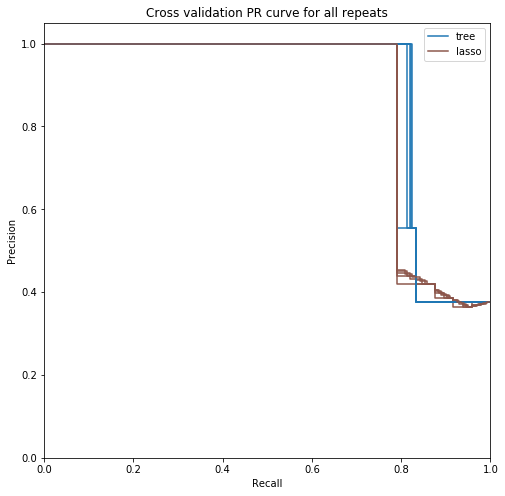

In [4]:
fit_cross_val_and_plot_pr(X, y, classifiers)

The rule visualization is now contained in the function `visualize_tree_rules`.

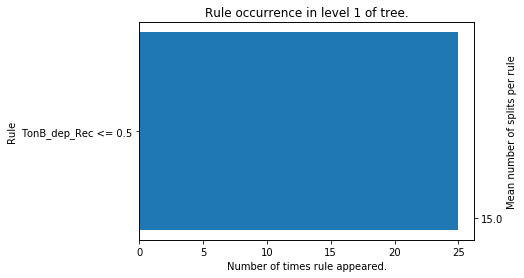

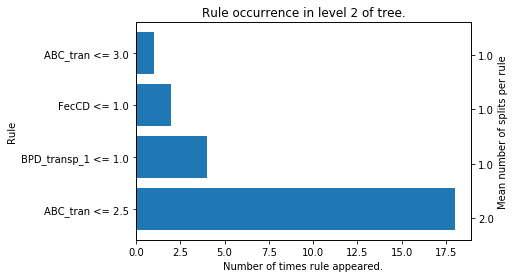

In [5]:
feature_names = d.columns.drop(['BGC', 'label', 'Gram'])
visualize_tree_rules(X, y, classifiers['tree'], feature_names)

Lastly, lasso visualization is now in `visualize_lasso_coeffs`.

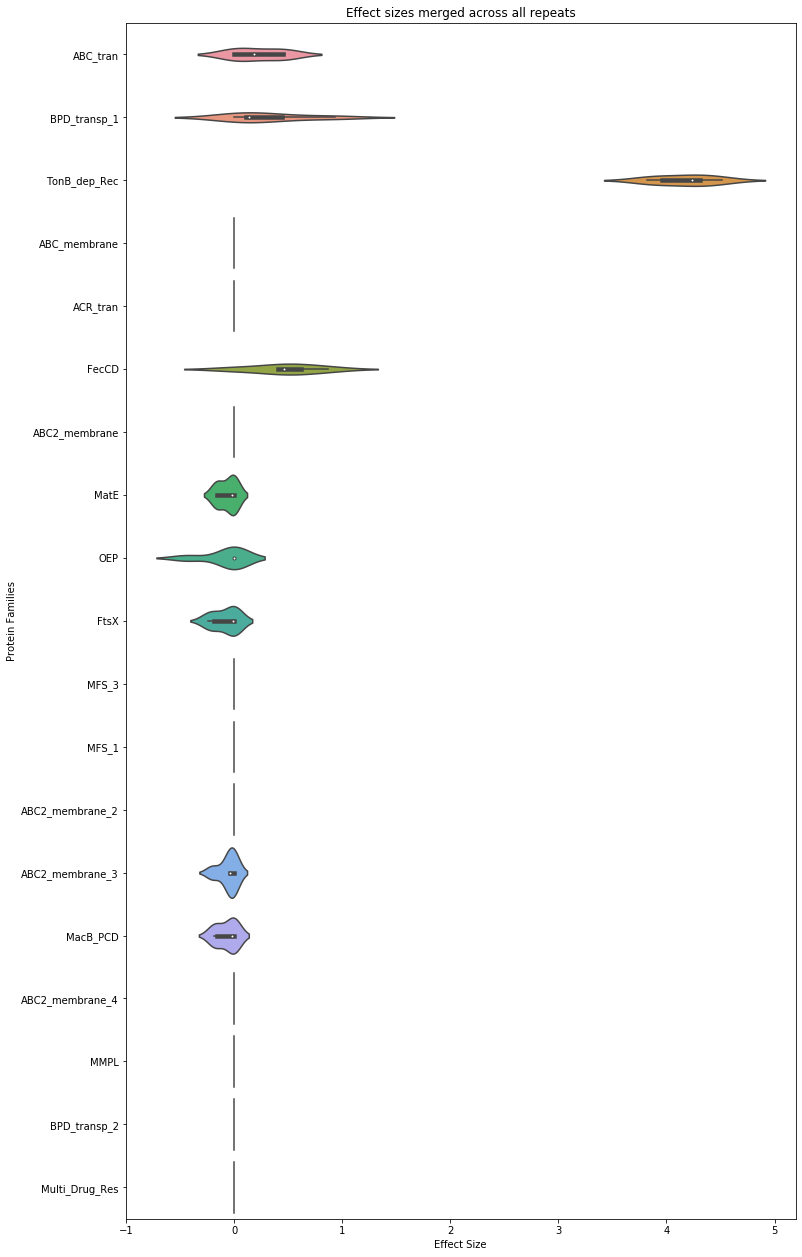

In [6]:
visualize_lasso_coeffs(X, y, classifiers['lasso'], feature_names)

# Siderophore analysis

Let's start with siderophore as always.

In [7]:
siderophore_data = {k: siderophore_preprocess(d, meta, verbose=True) for k, d in datasets.items()}

There are 257 examples for siderophore prediction.
Num positives: 39
Num negatives: 218
There are 257 examples for siderophore prediction.
Num positives: 39
Num negatives: 218
There are 257 examples for siderophore prediction.
Num positives: 39
Num negatives: 218
There are 257 examples for siderophore prediction.
Num positives: 39
Num negatives: 218


In [8]:
def powerset(iterable):
    "powerset([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)"
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))

